In [79]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [80]:
n = 100
X = torch.linspace(-5, 5, n).reshape(n, -1)
y= torch.tensor([num**2 + torch.randn(1).item() for num in X]).reshape(n , -1)
X

tensor([[-5.0000],
        [-4.8990],
        [-4.7980],
        [-4.6970],
        [-4.5960],
        [-4.4949],
        [-4.3939],
        [-4.2929],
        [-4.1919],
        [-4.0909],
        [-3.9899],
        [-3.8889],
        [-3.7879],
        [-3.6869],
        [-3.5859],
        [-3.4848],
        [-3.3838],
        [-3.2828],
        [-3.1818],
        [-3.0808],
        [-2.9798],
        [-2.8788],
        [-2.7778],
        [-2.6768],
        [-2.5758],
        [-2.4747],
        [-2.3737],
        [-2.2727],
        [-2.1717],
        [-2.0707],
        [-1.9697],
        [-1.8687],
        [-1.7677],
        [-1.6667],
        [-1.5657],
        [-1.4646],
        [-1.3636],
        [-1.2626],
        [-1.1616],
        [-1.0606],
        [-0.9596],
        [-0.8586],
        [-0.7576],
        [-0.6566],
        [-0.5556],
        [-0.4545],
        [-0.3535],
        [-0.2525],
        [-0.1515],
        [-0.0505],
        [ 0.0505],
        [ 0.1515],
        [ 0.

In [13]:
y

tensor([[26.2650],
        [23.6828],
        [22.8224],
        [22.4642],
        [21.7550],
        [18.6416],
        [19.5838],
        [17.5085],
        [17.4939],
        [17.3155],
        [15.2990],
        [15.5704],
        [14.4497],
        [11.2083],
        [12.7044],
        [12.1865],
        [11.9322],
        [13.4804],
        [ 9.6918],
        [ 9.4447],
        [10.4354],
        [ 7.1830],
        [ 7.3050],
        [ 5.7500],
        [ 6.2801],
        [ 4.8656],
        [ 6.4156],
        [ 3.6331],
        [ 2.3596],
        [ 4.2673],
        [ 2.3901],
        [ 3.2810],
        [ 3.6712],
        [ 3.6716],
        [ 1.6542],
        [ 2.8123],
        [ 1.1373],
        [ 2.0890],
        [ 0.7168],
        [ 3.1923],
        [ 1.9731],
        [ 0.0413],
        [ 1.6807],
        [ 1.6041],
        [ 0.7034],
        [-0.9150],
        [ 0.7698],
        [-1.7652],
        [-0.5765],
        [ 0.6212],
        [-0.4525],
        [-0.1861],
        [ 0.

In [14]:
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [15]:
X[:5], y[:5]

(tensor([[-5.0000],
         [-4.8990],
         [-4.7980],
         [-4.6970],
         [-4.5960]]),
 tensor([[26.2650],
         [23.6828],
         [22.8224],
         [22.4642],
         [21.7550]]))

<function matplotlib.pyplot.show(close=None, block=None)>

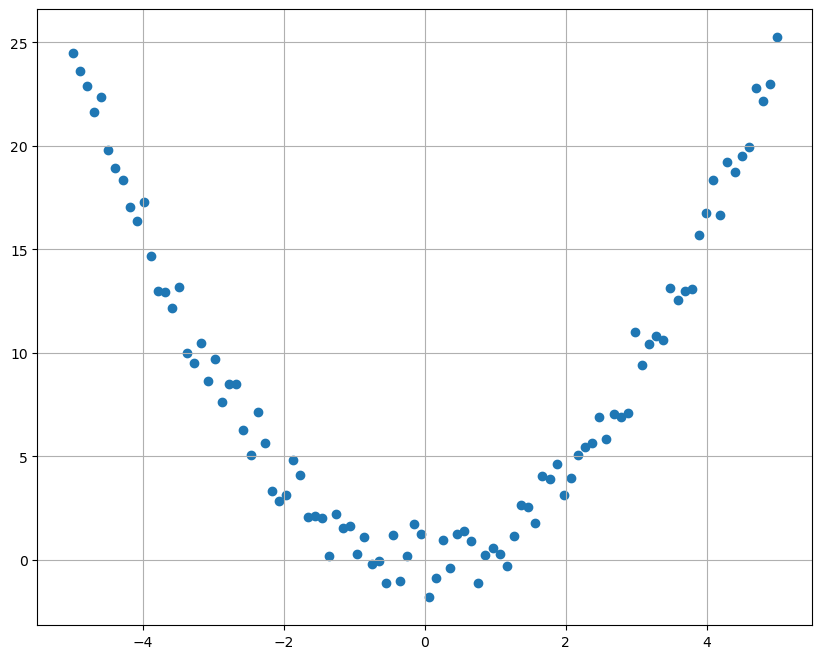

In [81]:
plt.figure(figsize=(10,8))
plt.grid()
plt.scatter(X, y)
plt.show

In [82]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(1, 32)
        self.hidden_1 = nn.Linear(32, 64)
        self.output = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_1(x))
        x = self.output(x)
        return x

In [87]:
leanring_rate = 0.001
n_epochs = 500

model = ANN()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=leanring_rate)

for epoch in range(n_epochs):

    pred = model(X)

    loss = loss_func(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step

    print(f'epoch ({epoch}) ... Loss: {loss}')

epoch (0) ... Loss: 122.15760803222656
epoch (1) ... Loss: 122.15760803222656
epoch (2) ... Loss: 122.15760803222656
epoch (3) ... Loss: 122.15760803222656
epoch (4) ... Loss: 122.15760803222656
epoch (5) ... Loss: 122.15760803222656
epoch (6) ... Loss: 122.15760803222656
epoch (7) ... Loss: 122.15760803222656
epoch (8) ... Loss: 122.15760803222656
epoch (9) ... Loss: 122.15760803222656
epoch (10) ... Loss: 122.15760803222656
epoch (11) ... Loss: 122.15760803222656
epoch (12) ... Loss: 122.15760803222656
epoch (13) ... Loss: 122.15760803222656
epoch (14) ... Loss: 122.15760803222656
epoch (15) ... Loss: 122.15760803222656
epoch (16) ... Loss: 122.15760803222656
epoch (17) ... Loss: 122.15760803222656
epoch (18) ... Loss: 122.15760803222656
epoch (19) ... Loss: 122.15760803222656
epoch (20) ... Loss: 122.15760803222656
epoch (21) ... Loss: 122.15760803222656
epoch (22) ... Loss: 122.15760803222656
epoch (23) ... Loss: 122.15760803222656
epoch (24) ... Loss: 122.15760803222656
epoch (25)

In [54]:
predications = model(X)

In [55]:
predications[:5]

tensor([[-0.1591],
        [-0.1580],
        [-0.1570],
        [-0.1555],
        [-0.1540]], grad_fn=<SliceBackward0>)

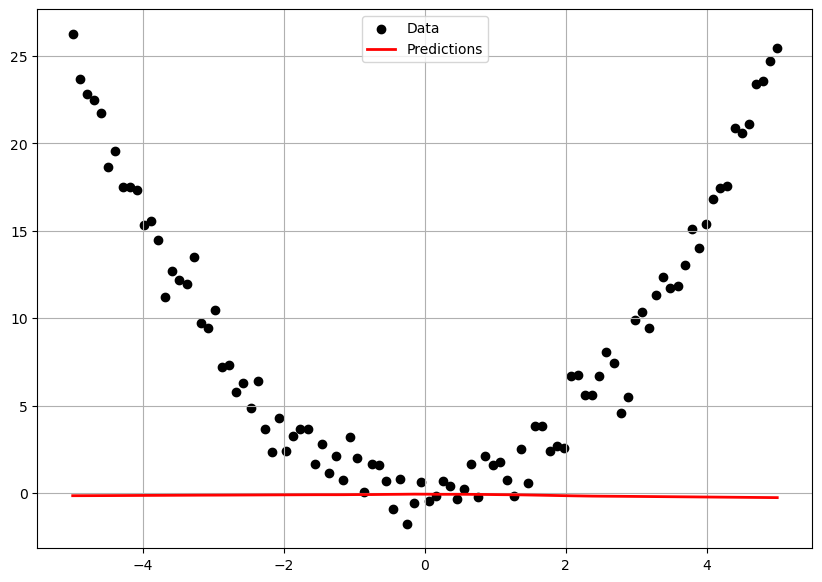

In [56]:
plt.figure(figsize=(10, 7))

plt.scatter(X, y, c="#000", label="Data")
plt.plot(X, predications.detach(), c="red", lw=2, label="Predictions")
plt.legend()
plt.grid()
plt.show()

In [88]:
from sklearn.metrics import  mean_squared_error

def train_and_evaluate(X, y, lr, n_epochs):
    model = ANN()
    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=leanring_rate)

    for epoch in range(n_epochs):
        pred = model(X)
        loss = loss_func(pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = model(X).detach()
    mse = mean_squared_error(y, predictions)
    return predictions.detach(), mse 

In [110]:
from itertools import cycle
cycol = cycle('bgrcmk')

def plot_true_vs_predictions(x, y, pred, mse):
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, c=next(cycol), label="Data")
    plt.plot(x, pred, c=next(cycol), lw=2, label="Predictions")
    plt.title(f"Acutal vs. predicted; MSE = {mse:.3f}")
    plt.legend()
    plt.grid()
    plt.show()

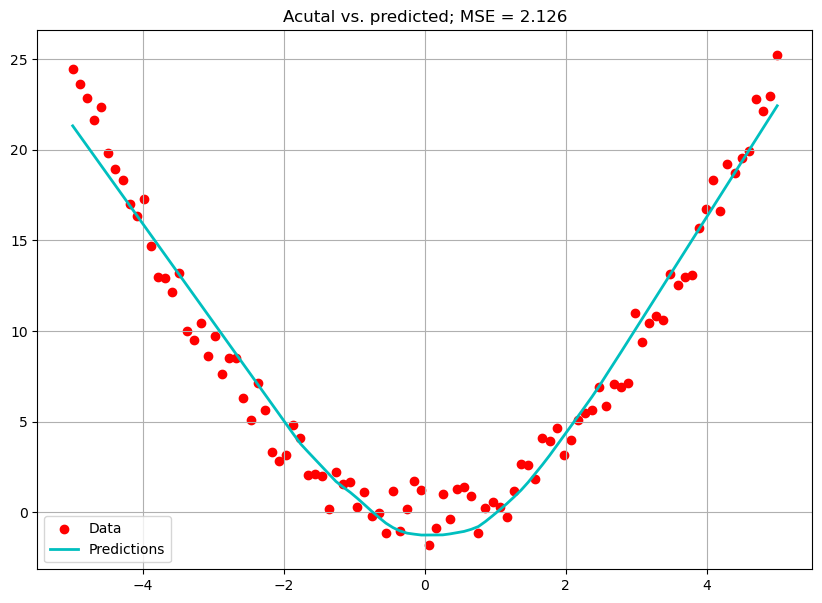

In [112]:
predictions_ann2, mse_ann2 = train_and_evaluate(X, y, 0.01, 500)
plot_true_vs_predictions(X, y, predictions_ann2, mse_ann2)

In [91]:
from itertools import cycle
cycol = cycle('bgrcmk')